In [1]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit.visualization import plot_distribution,plot_state_city,plot_histogram
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit_aer import aerprovider
from qiskit import Aer,execute,IBMQ
from qiskit.providers.ibmq import least_busy

### 1.Oracle的构造

In [2]:
Initialization = QuantumCircuit(5)
Initialization.x(4)
Initialization.h(range(5))
Init_state = Initialization.to_instruction(label='Initalize')

### 2.Oracle的构造

In [4]:
Oracle_op =QuantumCircuit(5)
Oracle_op.barrier()
Oracle_op.cx(0,2)
Oracle_op.x(2)
Oracle_op.barrier()
Oracle_op.cx(1,3)
Oracle_op.x(3)
Oracle_op.mcx([2,3],4)
Oracle_op.x(3)
Oracle_op.cx(1,3)
Oracle_op.barrier()
Oracle_op.x(2)
Oracle_op.cx(0,2)
Oracle_op.barrier()
Oracle = Oracle_op.to_instruction(label='Oracle')

### 3.Diffusion的构造

In [5]:
Diffusion_operator = QuantumCircuit(4)
Diffusion_operator.h(range(4))
Diffusion_operator.x(range(4))
Diffusion_operator.barrier()
Diffusion_operator.h(3)
Diffusion_operator.mcx([0,1,2],3)
Diffusion_operator.h(3)
Diffusion_operator.barrier()
Diffusion_operator.x(range(4))
Diffusion_operator.h(range(4))
Diffusion_operator.barrier()
Diffusion = Diffusion_operator.to_instruction(label='Diffusion')

### 开始构造 k=1

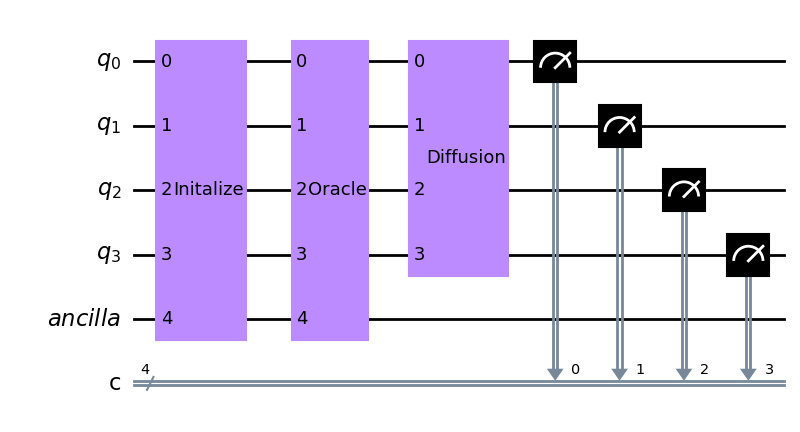

In [6]:
qc = QuantumRegister(4,'q')
anc = QuantumRegister(1, 'ancilla')
cbits = ClassicalRegister(4,'c')
qc = QuantumCircuit(qc,anc,cbits)
qc.append(Init_state,range(5))
qc.append(Oracle,range(5))
qc.append(Diffusion,range(4))
qc.measure([0,1,2,3],[0,1,2,3])
qc.draw('mpl')

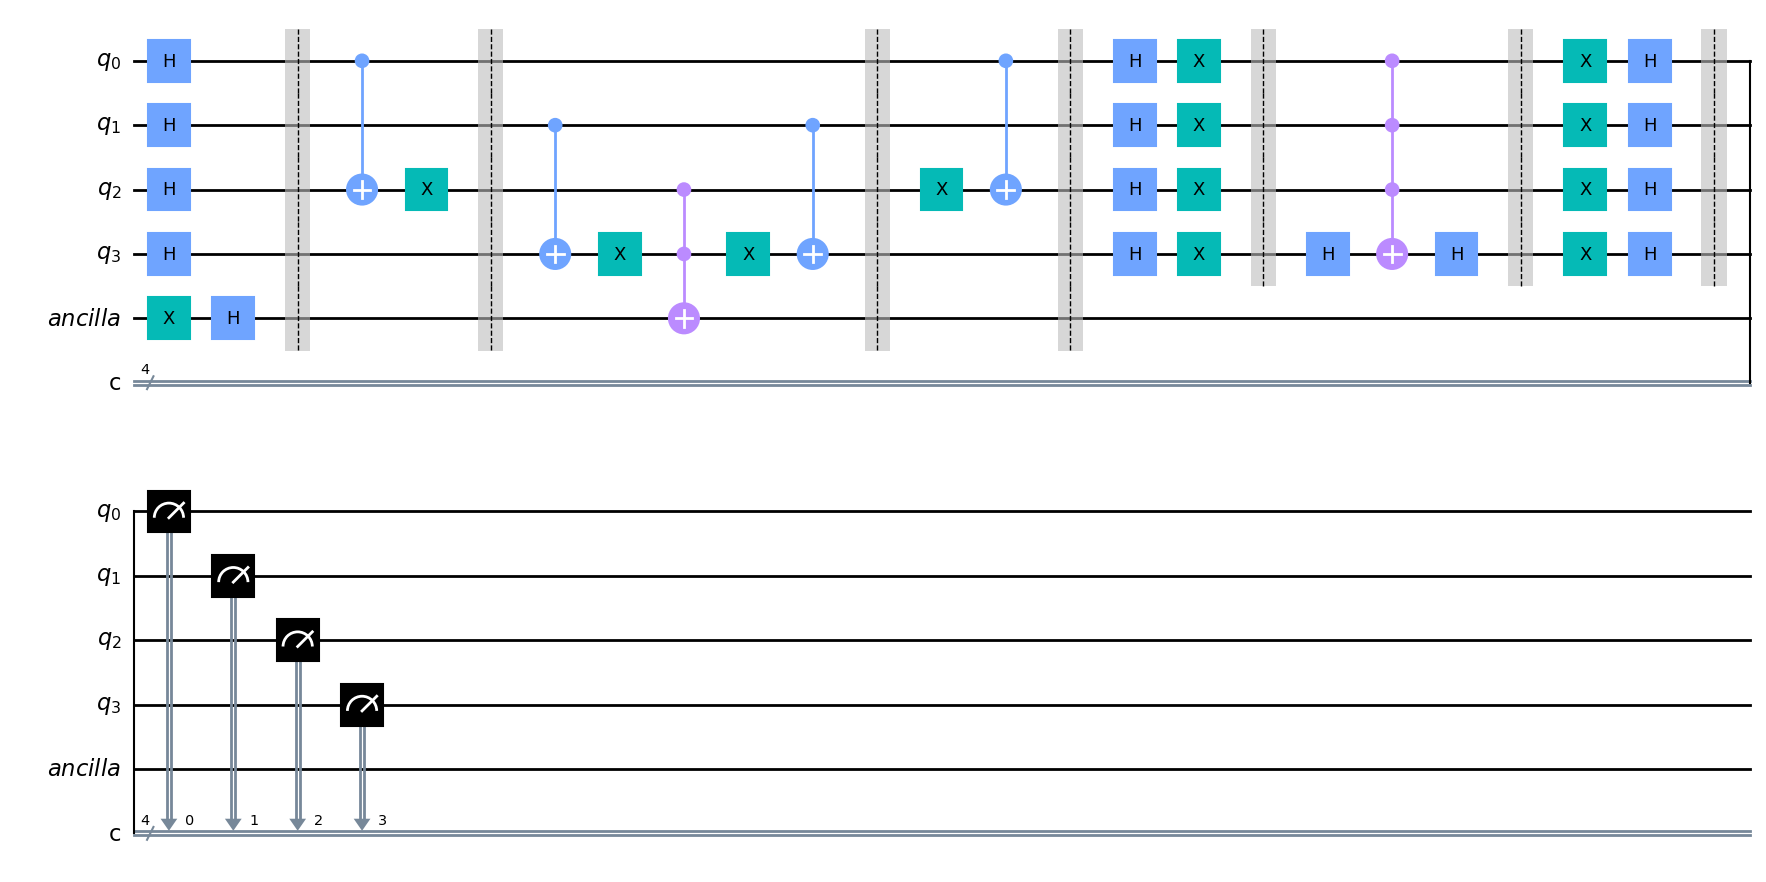

In [7]:
qc.decompose().draw('mpl')

## 1.在本地模拟器上运行

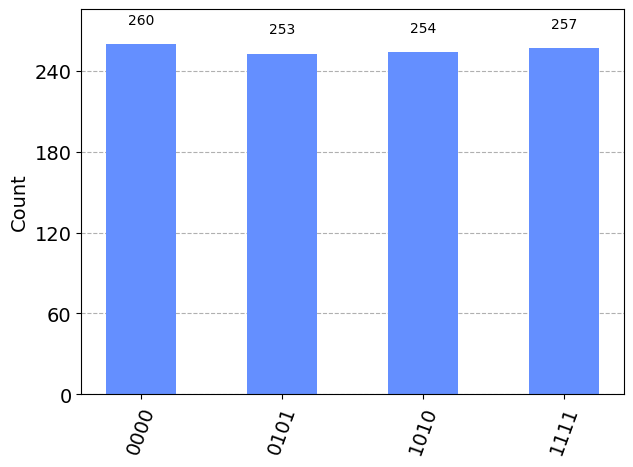

In [46]:
backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

## 2.在真实量子计算机上运行

In [48]:
IBMQ.load_account()
provider = IBMQ.get_provider(group = 'open')
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

IBMQAccountCredentialsNotFound: 'No IBM Quantum Experience credentials found.'